In [7]:
import os
import sys
sys.path.append("../virtuosoNet")
sys.path.append("C:\\Users\\fosca\\Desktop\\CNAM\\midi_beat_tracking\\FMP_0.1.0")
import pyScoreParser
from pathlib import Path
import pandas as pd
import music21 as m21
import pretty_midi as pm
from  matplotlib import pyplot as plt
import LibFMP.B
import LibFMP.C2
import LibFMP.C6
%matplotlib inline
import numpy as np
import math
import pandas as pd
import librosa

import IPython.display as ipd

In [2]:
with open("../datasets/virtuosoNet_data/training_data.dat", "rb") as f:
    u = pickle.load(f)

NameError: name 'pickle' is not defined

In [ ]:
u.keys()

In [8]:
len(u)

2

# Virtuosonet XML and MIDI

In [3]:
entries = Path('virtuosonet_xmlmidi/')
authors = [p.name for p in Path('virtuosonet_xmlmidi/').iterdir() if p.name[0] != "."]
authors

['Bach',
 'Balakirev',
 'Beethoven',
 'Brahms',
 'Chopin',
 'Debussy',
 'Glinka',
 'Haydn',
 'Liszt',
 'Mozart',
 'Prokofiev',
 'Rachmaninoff',
 'Ravel',
 'readme.txt',
 'Schubert',
 'Schumann',
 'Scriabin']

In [4]:
midi2midi_path = Path("virtuosonet_xmlmidi/Bach/Fugue/bwv_846/Shi05_infer_corresp.txt")

text = midi2midi_path.read_text()
for line in text.splitlines():
    print(line)

// alignID alignOntime alignSitch alignPitch alignOnvel refID refOntime refSitch refPitch refOnvel
0	2.70299	C4	60	36	0	0.25	C4	60	80	
1	3.29915	D4	62	51	1	0.5	D4	62	80	
2	3.90919	E4	64	54	2	0.75	E4	64	80	
3	4.56838	F4	65	57	3	1	F4	65	80	
4	5.59082	G4	67	44	4	1.375	G4	67	80	
5	5.73077	F4	65	54	5	1.4375	F4	65	80	
6	5.86646	E4	64	53	6	1.5	E4	64	80	
7	6.4936	A4	69	61	7	1.75	A4	69	80	
8	7.12714	D4	62	47	8	2	D4	62	80	
9	7.79274	G4	67	51	9	2.25	G4	67	80	
10	8.85257	A4	69	42	10	2.625	A4	69	80	
11	9.13783	G4	67	41	11	2.75	G4	67	80	
12	9.41774	F4	65	44	12	2.875	F4	65	80	
13	9.70086	E4	64	41	13	3	E4	64	80	
14	9.9733	F4	65	50	14	3.125	F4	65	80	
15	10.2436	G4	67	57	15	3.25	G4	67	80	
16	10.2724	E4	64	36	16	3.25	E4	64	80	
17	10.5716	D4	62	45	17	3.375	D4	62	80	
18	10.828	A4	69	65	18	3.5	A4	69	80	
19	10.8579	C4	60	36	19	3.5	C4	60	80	
20	11.1197	D4	62	45	20	3.625	D4	62	80	
21	11.3932	B4	71	71	21	3.75	B4	71	80	
22	11.4081	C4	60	40	22	3.75	C4	60	80	
23	11.6945	B3	59	44	23	3.875	B3	59	80	
24	12.0075	C5	72

In [5]:
# score_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-3/musicxml_cleaned.musicxml')
# score2midi_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-3/Na06_infer_match.txt')
# midi_quant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-3/midi_cleaned.mid')

score_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/musicxml_cleaned.musicxml')
midi_quant_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/midi_cleaned.mid')
score2midi_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/Stahievitch02_infer_match.txt')
midi2midi_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/Stahievitch02_infer_corresp.txt')
midi_unquant_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/Stahievitch02.mid')

# score_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/musicxml_cleaned.musicxml')
# midi_quant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/musicxml_cleaned.mid')
# score2midi_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/Na06_infer_match.txt')
# midi2midi_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/Na06_infer_corresp.txt')
# midi_unquant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/Na06.mid')



In [6]:
df = pd.read_csv(score2midi_path,sep="\t",skiprows=4, header=None,index_col=0)
df.columns =["onset_time","offset_time", "spelled pitch", "onset_velocity", "offset_velocity", "channel","match_status", "score_time", "note_ID","error_index","skip index"]
#delete the missing notes
df = df[df.index.str[0]!="/"]
df

onset_time  offset_time spelled pitch  onset_velocity  offset_velocity  \
0                                                                             
0        2.0219      2.10336            B4            46.0             58.0   
1        2.1274      2.18616            A4            55.0             61.0   
2       2.23023      2.28632           G#4            58.0             62.0   
3       2.33707      2.43723            A4            61.0             47.0   
4       2.46127      2.56811            A3            42.0             51.0   
5       2.46127      2.67494            C5            54.0             52.0   
6       2.66693      2.70967            C4            35.0             55.0   
7       2.68162      2.72035            E4            34.0             54.0   
8       2.86057      2.91266            C4            48.0             59.0   
9       2.86325      2.94070            D5            60.0             56.0   
10      2.87526      2.92067            E4            32.0             54.0   
11      2.96341      3.04620            C5            56.0             60.0   
12      3.06624      3.11565            C4            45.0             59.0   
13      3.06757      3.11832            E4            48.0             61.0   
14      3.06891      3.11966            B4            61.0             63.0   
15      3.16373      3.27190            C5            68.0             58.0   
16      3.26121      3.36805            A3            49.0             55.0   
17      3.28125      3.48958            E5            65.0             60.0   
18      3.45753      3.50026            C4            50.0             64.0   
19      3.47355      3.51362            E4            50.0             64.0   
20      3.65384      3.70860            E4            48.0             61.0   
21      3.65518      3.72195            F5            56.0             62.0   
22      3.65918      3.69658            C4            44.0             59.0   
23      3.73664      3.80876            E5            64.0             58.0   
24      3.83547      3.89690           Eb5            63.0             63.0   
25      3.85016      3.89556            C4            45.0             59.0   
26      3.86351      3.91693            E4            42.0             57.0   
27      3.92895      3.97035            E5            70.0             61.0   
28      4.03044      4.12393            B5            68.0             61.0   
29      4.03579      4.09722            A3            54.0             60.0   
...         ...          ...           ...             ...              ...   
2794    187.353    187.42400            A3            83.0             62.0   
2795    187.544    187.59300            A5            91.0             67.0   
2796    187.548    187.57900            A4            81.0             67.0   
2797    187.549    187.60100            A2            65.0             65.0   
2798    187.553    187.59300            A3            77.0             66.0   
2799    187.553    187.59900            E3            69.0             69.0   
2800    187.557    187.60300           C#3            65.0             64.0   
2801    187.742    187.79100            E6            98.0             61.0   
2802    187.751    187.79900            E5            90.0             58.0   
2803    187.756    187.83200            A3            76.0             62.0   
2804    187.967    188.00300            A2            84.0             67.0   
2805    187.971    188.02100            A5           101.0             66.0   
2806    187.973    188.00700            A4            99.0             67.0   
2807    188.397    188.43300            A4            97.0             67.0   
2808      188.4    188.44900            A5            94.0             66.0   
2809    188.401    188.44800           C#5            93.0             66.0   
2810    188.409    188.44100            E5            90.0             71.0   
2811    188.409    188.44900            A2            8

In [7]:
midi2midi_path = Path("virtuosonet_xmlmidi/Bach/Fugue/bwv_846/Shi05_infer_match.txt")

df_m2m = pd.read_csv(midi2midi_path,sep="\t",skiprows=1, header=None, index_col=False)
df_m2m.columns =["alignID", "alignOntime", "alignSitch" ,"alignPitch", "alignOnvel", "refID", "refOntime", "refSitch", "refPitch", "refOnvel","empty"]
#drop the last column "empty"
df_m2m = df_m2m.drop(columns=["empty"])
#drop the rows where the alignOntime is -1 (note not existing in midi)
df_m2m = df_m2m[df_m2m["alignOntime"] != -1]
df_m2m

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 12


In [8]:
score = m21.converter.parse(str(score_path))
part1 = score.parts[0]
part1 = part1.expandRepeats()
part1.show("text")

{0.0} <music21.instrument.Instrument 'P1: Piano: Piano'>
{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.expressions.TextExpression "Allegretto">
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.KeySignature of no sharps or flats>
    {0.0} <music21.meter.TimeSignature 2/4>
    {0.0} <music21.dynamics.Dynamic p >
    {0.0} <music21.note.Note B>
    {0.25} <music21.note.Note A>
    {0.5} <music21.note.Note G#>
    {0.75} <music21.note.Note A>
{0.0} <music21.spanner.Slur <music21.note.Note B><music21.note.Note C>>
{0.0} <music21.spanner.Slur <music21.note.Note D><music21.note.Note E>>
{0.0} <music21.spanner.Slur <music21.note.Note F><music21.note.Note C>>
{0.0} <music21.spanner.Slur <music21.note.Note G><music21.note.Note B>>
{0.0} <music21.spanner.Slur <music21.note.Note G><music21.note.Note B>>
{0.0} <music21.spanner.Slur <music21.note.Note G><music21.note.Note B>>
{0.0} <music21.spanner.Slur <music21.note.Note A><music21

In [9]:
mididata = pm.PrettyMIDI(str(midi_quant_path))
downbeats = mididata.get_downbeats()
beats = mididata.get_beats()

#clean beats from the errors from repetitions
b_len = downbeats[2]-downbeats[1]
assert(db_len == downbeats[3]-downbeats[2] )
cleaned_downbeat = []
wrong_ind = 0
for i, db in enumerate(downbeats[:-2]):
    if downbeats[i+1]-downbeats[i] == db_len:
        cleaned_downbeat.append(db)
        wrong_ind = 0
    else:
        wrong_ind +=1
        if i > 0 and wrong_ind==2:
            if downbeats[i+1]-downbeats[i-1] == db_len:
                cleaned_downbeat.append(downbeats[i-1])
            else:
                print("Too many weird downbeats")
                break

    
cleaned_downbeat

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


NameError: name 'db_len' is not defined

In [ ]:
STARTING_TIME = 0
ENDING_TIME = 30
LOC = 25
FS = 100 # 0.05ms windows

midi_path = midi_quant_path
mididata = pm.PrettyMIDI(str(midi_path))

starting_index = STARTING_TIME * FS
ending_index = ENDING_TIME * FS
midi_matrix = mididata.get_piano_roll(fs = FS)[::-1,starting_index:ending_index]
# midi_matrix = np.random.random((20, 20))

beats = mididata.get_beats()
downbeats = cleaned_downbeat

annot = []
downbeat_index = 0
for i, b in enumerate(beats):
    if downbeat_index< len(downbeats) and downbeats[downbeat_index] == b:
        annot.append((b, "downbeat"))
        downbeat_index +=1
    else:
        annot.append((b, "beat"))

label_keys = {'downbeat': {'linewidth': 3, 'color': 'b'},
              'beat': {'linewidth': 1, 'color': 'r'}}

fig, ax = plt.subplots(1, 1, sharey=True, figsize=(8, 4))
ax.imshow(midi_matrix, cmap='gray_r', aspect='auto', extent=[STARTING_TIME, ENDING_TIME, 0, 1], alpha=0.5)
LibFMP.B.plot_annotation_line(annot, ax=ax, label_keys=label_keys, time_min=STARTING_TIME, time_max=ENDING_TIME)
plt.tight_layout()

In [10]:
performance_downbeats = []
for db in cleaned_downbeat:
    p_ons=list(df_m2m[df_m2m["refOntime"]==db]["alignOntime"])
    if len(p_ons) == 0:
        performance_downbeats.append(None)
    else:
        performance_downbeats.append(np.mean(p_ons))

print(performance_downbeats)

# clean the values that are smaller than the value before
for ind,db in enumerate(performance_downbeats[1:]):
    if (ind >0) and (db is not None) and (performance_downbeats[ind-1] is not None) and (db < performance_downbeats[ind-1]) :
        print("Weird value",db,"smaller than the previous",performance_downbeats[ind-1])
        performance_downbeats[ind] = None
    
#interpolate to fill the None values
s = pd.Series(performance_downbeats)
s = list(s.interpolate())
print(s)

NameError: name 'cleaned_downbeat' is not defined

In [11]:
mididata = pm.PrettyMIDI(str(midi_unquant_path))

STARTING_TIME = 0
ENDING_TIME = 30
LOC = 25
FS = 100 # 0.05ms windows

starting_index = int(np.floor(STARTING_TIME * FS))
ending_index = int(np.ceil(ENDING_TIME * FS))
print(starting_index,ending_index)
midi_matrix = mididata.get_piano_roll(fs = FS)[::-1,starting_index:ending_index]
# midi_matrix = np.random.random((20, 20))

downbeats = s

annot = []
downbeat_index = 0
for i, b in enumerate(downbeats):
    annot.append((b, "downbeat"))

label_keys = {'downbeat': {'linewidth': 3, 'color': 'b'},
              'beat': {'linewidth': 1, 'color': 'r'}}

fig, ax = plt.subplots(1, 1, sharey=True, figsize=(8, 4))
ax.imshow(midi_matrix, cmap='gray_r', aspect='auto', extent=[STARTING_TIME, ENDING_TIME, 0, 1], alpha=0.5)
LibFMP.B.plot_annotation_line(annot, ax=ax, label_keys=label_keys, time_min=STARTING_TIME, time_max=ENDING_TIME)
plt.tight_layout()

0 3000


NameError: name 's' is not defined

## Data cleaning
### Downbeat cleaning

In [12]:
def cleaned_quant_downbeat(midi_quant_path):
    mididata = pm.PrettyMIDI(str(midi_quant_path))
    downbeats = mididata.get_downbeats()

    #clean downbeats from the errors from repetitions
    db_len = downbeats[2]-downbeats[1]
    cleaned_downbeat = []
    wrong_ind = 0
    for i, db in enumerate(downbeats[:-2]):
        if math.isclose(downbeats[i+1]-downbeats[i], db_len, rel_tol=1e-2):
            cleaned_downbeat.append(db)
            wrong_ind = 0
        else:
            wrong_ind +=1
            if i > 0 and wrong_ind==2:
                if math.isclose(downbeats[i+1]-downbeats[i-1], db_len, rel_tol=1e-2):
                    cleaned_downbeat.append(downbeats[i-1])
                else:
                    raise ValueError("Too many unexpected downbeats. Probably the temopo or time signature change.")
    return cleaned_downbeat

def cleaned_m2m_df(midi2midi_path):
    m2mdf = pd.read_csv(midi2midi_path,sep="\t",skiprows=1,header=None, index_col=False)
    m2mdf.columns =["alignID", "alignOntime", "alignSitch" ,"alignPitch", "alignOnvel", "refID", "refOntime", "refSitch", "refPitch", "refOnvel","empty"]
    #drop the last column "empty"
    m2mdf = m2mdf.drop(columns=["empty"])
    #drop the rows where the alignOntime is -1 (note not existing in midi)
    return m2mdf[m2mdf["alignOntime"] != -1]

def cleaned_unquant_downbeat(m2m_df, cl_quant_dbs):
    unquant_dbs = []
    for i,db in enumerate(cl_quant_dbs):
        p_ons=list(m2m_df[(m2m_df["refOntime"]>db-0.035) & (m2m_df["refOntime"]<db+0.035)]["alignOntime"])
        if len(p_ons) == 0:
            if i >0: #don't append for the first downbeat (usually it is 0)
                unquant_dbs.append(None)
        else:
            unquant_dbs.append(np.mean(p_ons))

    # clean the values that are smaller than the value before
    for ind,db in enumerate(unquant_dbs[1:]):
        if (ind >0) and (db is not None) and (unquant_dbs[ind-1] is not None) and (db < unquant_dbs[ind-1]) :
            print("Unexpected value",db,"smaller than the previous",unquant_dbs[ind-1])
            unquant_dbs[ind] = None

    #interpolate to fill the None values
    s = pd.Series(unquant_dbs)
    return list(s.interpolate())

In [13]:
#it should work
midi_quant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-3/midi_cleaned.mid')
cleaned_quant_downbeat(midi_quant_path)

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


[0.4736834999999999,
 1.7368394999999999,
 2.9999955,
 4.2631515,
 5.526307500000001,
 6.789463500000001,
 8.0526195,
 9.315775499999999,
 10.578931499999998,
 11.842087499999996,
 13.105243499999995,
 14.368399499999994,
 15.631555499999992,
 16.894711499999993,
 18.157867499999995,
 19.421023499999997,
 20.6841795,
 21.9473355,
 23.210491500000003,
 24.473647500000006,
 25.736803500000008,
 26.99995950000001,
 28.263115500000012,
 29.526271500000014,
 30.789427500000016,
 32.05258350000002,
 33.315739500000014,
 34.57889550000001,
 35.842051500000004,
 37.1052075,
 38.368363499999994,
 39.63151949999999,
 40.894675499999984,
 42.15783149999998,
 43.420987499999974,
 44.68414349999997,
 45.947299499999964,
 47.21045549999996,
 48.473611499999954,
 49.73676749999995,
 50.999923499999944,
 52.26307949999994,
 53.526235499999935,
 54.78939149999993,
 56.052547499999925,
 57.31570349999992,
 58.578859499999915,
 59.84201549999991,
 61.105171499999905,
 62.3683274999999,
 63.63148349999989

In [14]:
midi_quant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/midi_cleaned.mid')
cleaned_quant_downbeat(midi_quant_path)
#it should fail because of the tempo change

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


ValueError: Too many unexpected downbeats. Probably the temopo or time signature change.

In [15]:
def visualize_on_pianoroll(midi_path, markers, start_time, end_time):
    mididata = pm.PrettyMIDI(str(midi_path))
    STARTING_TIME = start_time
    ENDING_TIME = end_time
    FS = 100 # 0.05ms windows

    starting_index = int(np.floor(STARTING_TIME * FS))
    ending_index = int(np.ceil(ENDING_TIME * FS))
    midi_matrix = mididata.get_piano_roll(fs = FS)[::-1,starting_index:ending_index]
    # midi_matrix = np.random.random((20, 20))

    annot = []
    marker_index = 0
    for i, b in enumerate(markers):
        annot.append((b, "marker"))
    label_keys = {'marker': {'linewidth': 1, 'color': 'b'}}

    fig, ax = plt.subplots(1, 1, sharey=True, figsize=(8, 4))
    ax.imshow(midi_matrix, cmap='gray_r', aspect='auto', extent=[STARTING_TIME, ENDING_TIME, 0, 1], alpha=0.5)
    LibFMP.B.plot_annotation_line(annot, ax=ax, label_keys=label_keys, time_min=STARTING_TIME, time_max=ENDING_TIME)
    plt.tight_layout()

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


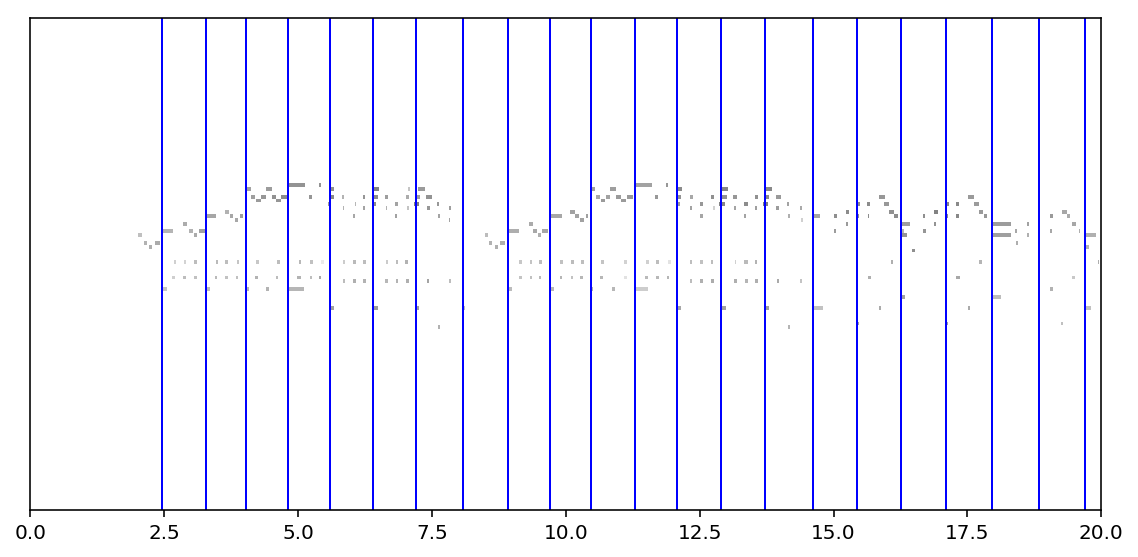

In [16]:
midi2midi_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/Stahievitch02_infer_corresp.txt')
midi_quant_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/midi_cleaned.mid')
midi_unquant_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/Stahievitch02.mid')

m2mdf = cleaned_m2m_df(midi2midi_path)
cl_q_db = cleaned_quant_downbeat(midi_quant_path)
cl_u_db = cleaned_unquant_downbeat(m2mdf,cl_q_db)
visualize_on_pianoroll(midi_unquant_path, cl_u_db,0,20)

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


  alignID  alignOntime alignSitch  alignPitch  alignOnvel refID  refOntime  \
0       0      1.07799         G4          67          65     0   0.000000   
1       1      1.22116         C5          72          70     1   0.157894   
2       2      1.36111         D5          74          69     2   0.315789   
3       3      1.50427        Eb5          75          80     3   0.473683   
4       4      1.52030         C3          48          44     4   0.473683   

  refSitch  refPitch  refOnvel  
0       G4        67        49  
1       C5        72        49  
2       D5        74        49  
3      Eb5        75        49  
4       C3        48        49  
[0.4736834999999999, 1.7368394999999999, 2.9999955]
[1.5122849999999999, 2.69605, 3.83227]


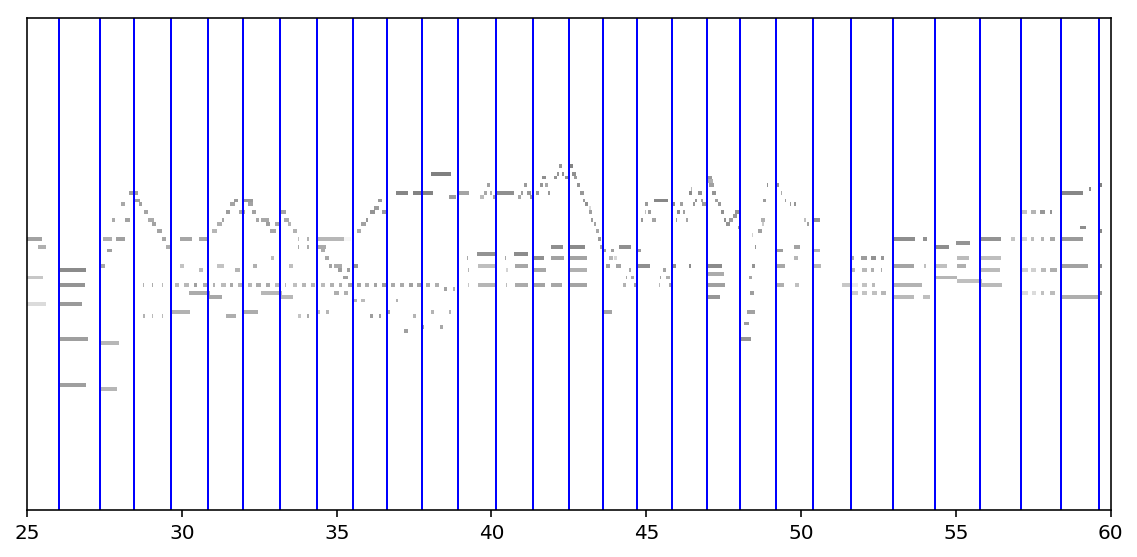

In [57]:
midi2midi_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-3/Na06_infer_corresp.txt')
midi_quant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-3/midi_cleaned.mid')
midi_unquant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-3/Na06.mid')
m2mdf = cleaned_m2m_df(midi2midi_path)
cl_q_db = cleaned_quant_downbeat(midi_quant_path)
cl_u_db = cleaned_unquant_downbeat(m2mdf,cl_q_db)

print(m2mdf.head())
print(cl_q_db[0:3])
print(cl_u_db[0:3])

visualize_on_pianoroll(midi_unquant_path, cl_u_db,25,60)


C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0]
[7.12714, 12.0219, 16.9247, 21.765, 26.764725, 31.601, 36.484366666666666, 41.7009, 46.546549999999996, 51.758633333333336, 56.71745, 61.703399999999995, 67.22336666666666, 72.7159, 77.85013333333333, 82.87543333333333, 88.39482499999998, 93.4228, 99.27574999999999, 104.232, 109.08500000000001, 114.13374999999999, 120.02566666666667, 125.923]


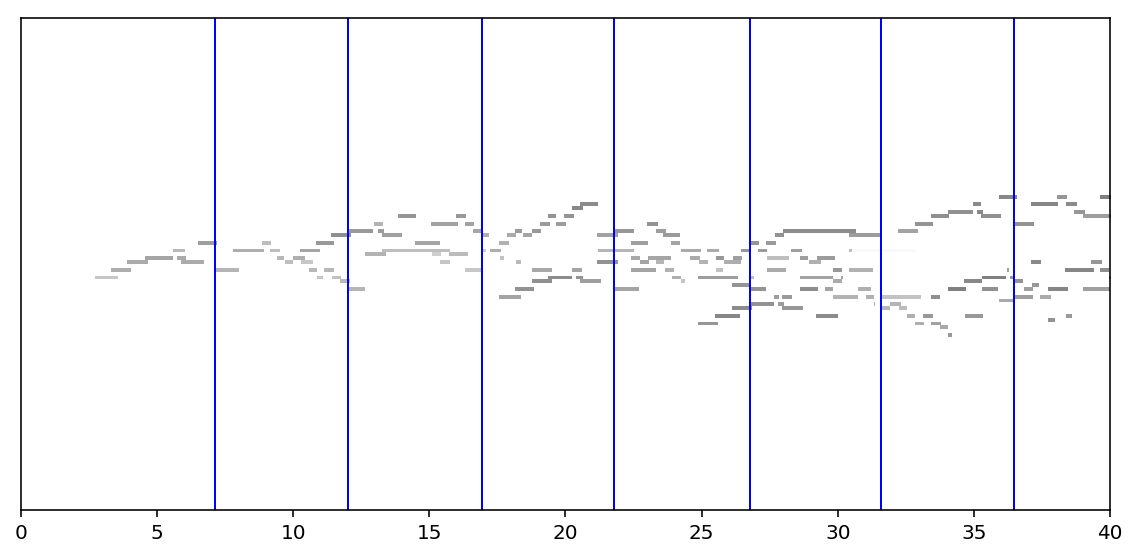

In [58]:
midi2midi_path = Path('virtuosonet_xmlmidi/Bach/Fugue/bwv_846/Shi05_infer_corresp.txt')
midi_quant_path = Path('virtuosonet_xmlmidi/Bach/Fugue/bwv_846/midi_cleaned.mid')
midi_unquant_path = Path('virtuosonet_xmlmidi/Bach/Fugue/bwv_846/Shi05.mid')

m2mdf = cleaned_m2m_df(midi2midi_path)
cl_q_db = cleaned_quant_downbeat(midi_quant_path)
print(cl_q_db)
cl_u_db = cleaned_unquant_downbeat(m2mdf,cl_q_db)
print(cl_u_db)

visualize_on_pianoroll(midi_unquant_path, cl_u_db,0,40)

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


[1.0588229999999998, 3.1764689999999995, 5.294115, 7.411760999999999, 9.529407, 11.647053000000003, 13.764699000000006, 15.882345000000008, 17.999991000000005, 20.117637000000002, 22.235283, 24.352928999999996, 26.470574999999993, 28.58822099999999, 30.705866999999987, 32.82351299999999, 34.941159, 37.05880500000001, 39.176451000000014, 41.29409700000002, 43.41174300000003, 45.52938900000004, 47.647035000000045, 49.76468100000005, 51.88232700000006, 53.99997300000007, 56.117619000000076, 58.23526500000008, 60.35291100000009, 62.4705570000001, 64.5882030000001, 66.70584900000011, 68.82349500000012, 70.94114100000013, 73.05878700000014, 75.17643300000015, 77.29407900000015, 79.41172500000016, 81.52937100000017, 83.64701700000018, 85.76466300000018, 87.88230900000019, 89.9999550000002, 92.1176010000002, 94.23524700000021, 96.35289300000022, 98.47053900000023, 100.58818500000024, 102.70583100000025, 104.82347700000025, 106.94112300000026, 109.05876900000027, 111.17641500000028, 113.2940610

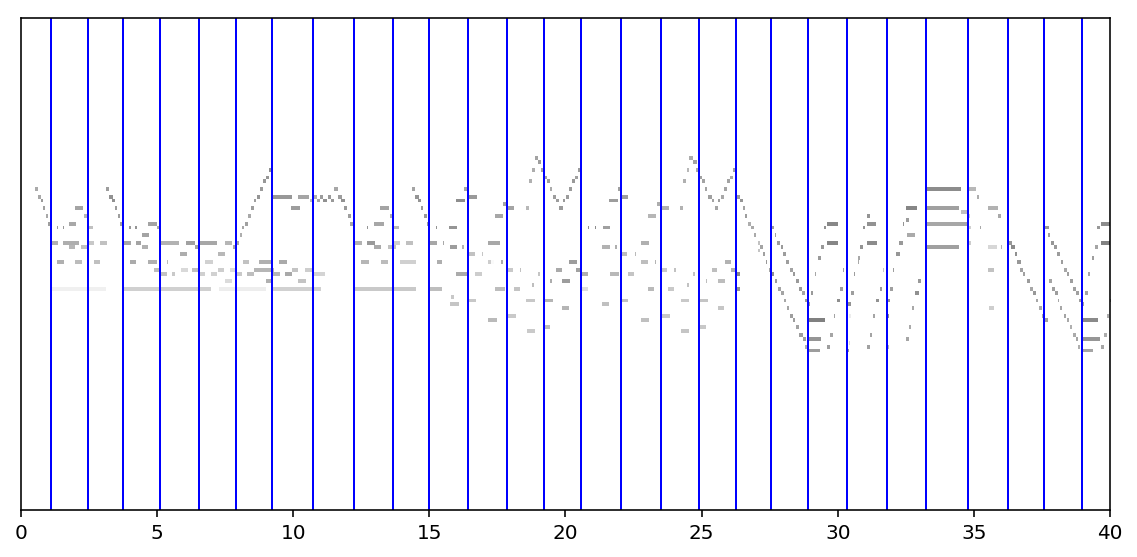

In [71]:
#a lot of None at beginning. Probably because of a missed repetition

midi2midi_path = Path('virtuosonet_xmlmidi/Schubert/Piano_Sonatas/664-3/KabuliL12_infer_corresp.txt')
midi_quant_path = Path('virtuosonet_xmlmidi/Schubert/Piano_Sonatas/664-3/midi_cleaned.mid')
midi_unquant_path = Path('virtuosonet_xmlmidi/Schubert/Piano_Sonatas/664-3/KabuliL12.mid')

m2mdf = cleaned_m2m_df(midi2midi_path)
cl_q_db = cleaned_quant_downbeat(midi_quant_path)
print(cl_q_db)
cl_u_db = cleaned_unquant_downbeat(m2mdf,cl_q_db)
print(cl_u_db)

visualize_on_pianoroll(midi_unquant_path, cl_u_db,0,40)

[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0, 124.0, 126.0, 128.0, 130.0, 132.0, 134.0, 136.0, 138.0, 140.0, 142.0, 144.0, 146.0, 148.0, 150.0, 152.0, 154.0, 156.0, 158.0, 160.0, 162.0, 164.0, 166.0, 168.0, 170.0, 172.0, 174.0, 176.0, 178.0, 180.0, 182.0, 184.0, 186.0, 188.0, 190.0, 192.0, 194.0, 196.0, 198.0, 200.0, 202.0, 204.0, 206.0, 208.0, 210.0, 212.0]
[1.831838, 4.7604225, 7.96796, 11.442325, 13.831216666666668, 16.895625000000003, 19.45514, 21.889966666666666, 23.94042, 26.432174999999997, 28.704625, 31.351499999999998, 33.63612, 36.498450000000005, 39.305416666666666, 42.49365, 45.07823333333334, 48.252725, 51.5412, 54.5663, 58.200916666666664, 60.8

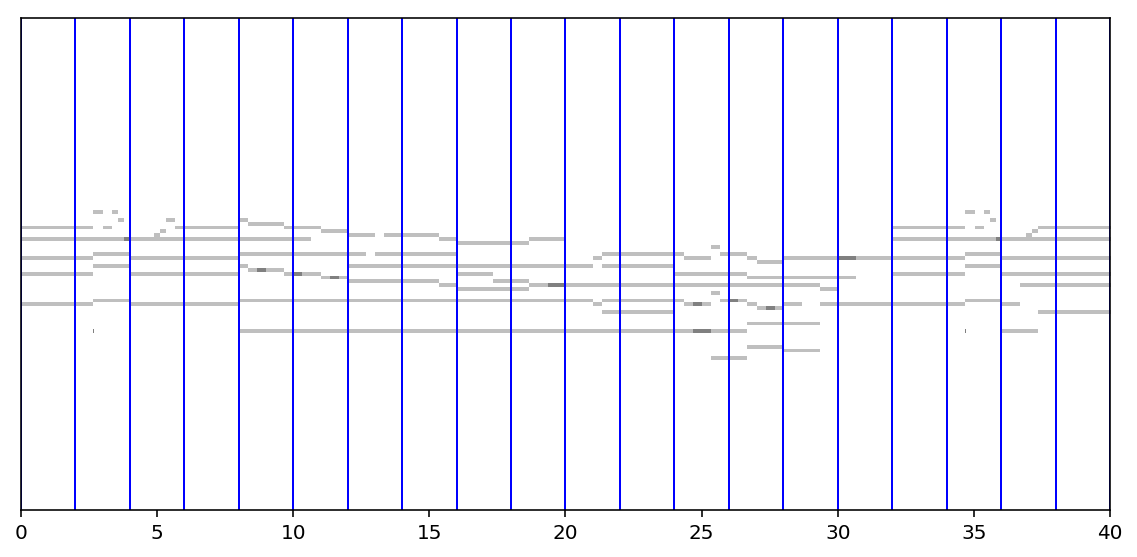

In [235]:
midi2midi_path = Path('virtuosonet_xmlmidi',df["midi2midi_alignment_path"].iloc[938])
midi_quant_path = Path('virtuosonet_xmlmidi',df["score_midi_path"].iloc[938])
midi_unquant_path = Path('virtuosonet_xmlmidi',df["performed_midi_path"].iloc[938])

m2mdf = cleaned_m2m_df(midi2midi_path)
cl_q_db = cleaned_quant_downbeat(midi_quant_path)
print(cl_q_db)
cl_u_db = cleaned_unquant_downbeat(m2mdf,cl_q_db)
print(cl_u_db)

visualize_on_pianoroll(midi_quant_path, cl_q_db,0,40)

## Beat Cleaning

In [28]:
def cleaned_quant_beat(midi_quant_path):
    mididata = pm.PrettyMIDI(str(midi_quant_path))
    beats = mididata.get_beats()

    #clean downbeats from the errors from repetitions and rhythmic changes
    b_len = beats[10]-beats[9]
    cleaned_beat = []
    wrong_ind = 0
    for i, b in enumerate(beats[:-2]):
        if math.isclose(beats[i+1]-beats[i], b_len, rel_tol=1e-2):
            cleaned_beat.append(b)
            wrong_ind = 0
        else:
            wrong_ind +=1
            if i > 0 and wrong_ind==8:
                #check if it is because of a repetition sign -> n consecutive short beats up to 8 (heuristic)
                raise ValueError("Too many unexpected beats. Probably the tempo or time signature change.")
    return cleaned_beat

def cleaned_unquant_beat(m2m_df, cl_quant_bs):
    unquant_bs = []
    is_at_the_beginning = True
    for b in cl_quant_bs:
        # 0.35s is the time to differentiate 2 notes on the same chord
        p_ons=list(m2m_df[(m2m_df["refOntime"]>b-0.035) & (m2m_df["refOntime"]<b+0.035)]["alignOntime"]) 
        if len(p_ons) == 0:
            if not is_at_the_beginning: #if we are dealing with the first beats, before the music starts, we don't append anything
                unquant_bs.append(None)
        else:
            is_at_the_beginning = False
            unquant_bs.append(np.mean(p_ons))

    # clean the beats that are clearly wrong (i.e. smaller than the value before)
    for ind,b in enumerate(unquant_bs[1:]):
        if (ind >0) and (b is not None) and (unquant_bs[ind-1] is not None) and (b < unquant_bs[ind-1]) :
            print("Unexpected value", b,"smaller than the previous",unquant_bs[ind-1])
            unquant_bs[ind] = None

    #interpolate to fill the None values
    s = pd.Series(unquant_bs)
    return list(s.interpolate())

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


  alignID  alignOntime alignSitch  alignPitch  alignOnvel refID  refOntime  \
0       0      2.02190         B4          71          46     0      0.000   
1       1      2.12740         A4          69          55     1      0.125   
2       2      2.23023        G#4          68          58     2      0.250   
3       3      2.33707         A4          69          61     3      0.375   
4       4      2.46127         A3          57          42     5      0.500   

  refSitch  refPitch  refOnvel  
0       B4        71        49  
1       A4        69        49  
2      G#4        68        49  
3       A4        69        49  
4       A3        57        49  
[0.0, 0.5, 1.0]
[2.0219, 2.4612700000000003, 2.8663600000000002]


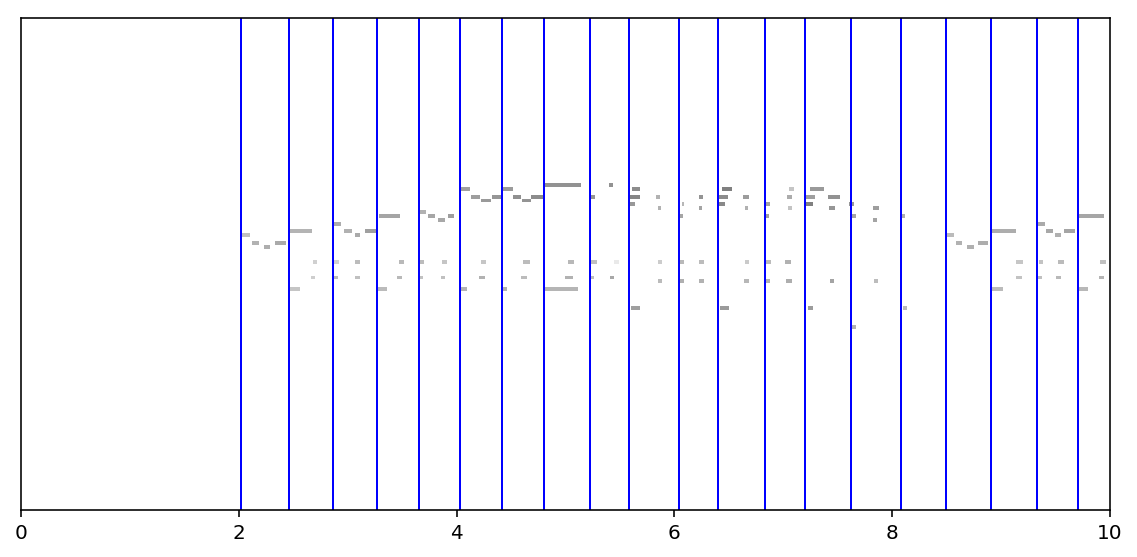

In [60]:
midi2midi_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/Stahievitch02_infer_corresp.txt')
midi_quant_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/midi_cleaned.mid')
midi_unquant_path = Path('virtuosonet_xmlmidi/Mozart/Piano_Sonatas/11-3/Stahievitch02.mid')

m2mdf = cleaned_m2m_df(midi2midi_path)
cl_q_b = cleaned_quant_beat(midi_quant_path)
cl_u_b = cleaned_unquant_beat(m2mdf,cl_q_b)

# mididata = pm.PrettyMIDI(str(midi_quant_path))
# beats = mididata.get_beats()

print(m2mdf.head())
print(cl_q_b[0:3])
print(cl_u_b[0:3])

visualize_on_pianoroll(midi_unquant_path, cl_u_b,0,10)

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


  alignID  alignOntime alignSitch  alignPitch  alignOnvel refID  refOntime  \
0       0      1.07799         G4          67          65     0   0.000000   
1       1      1.22116         C5          72          70     1   0.157894   
2       2      1.36111         D5          74          69     2   0.315789   
3       3      1.50427        Eb5          75          80     3   0.473683   
4       4      1.52030         C3          48          44     4   0.473683   

  refSitch  refPitch  refOnvel  
0       G4        67        49  
1       C5        72        49  
2       D5        74        49  
3      Eb5        75        49  
4       C3        48        49  
[0.4736834999999999, 1.1052615, 1.7368394999999999]
[1.5122849999999999, 2.0886750000000003, 2.69605]


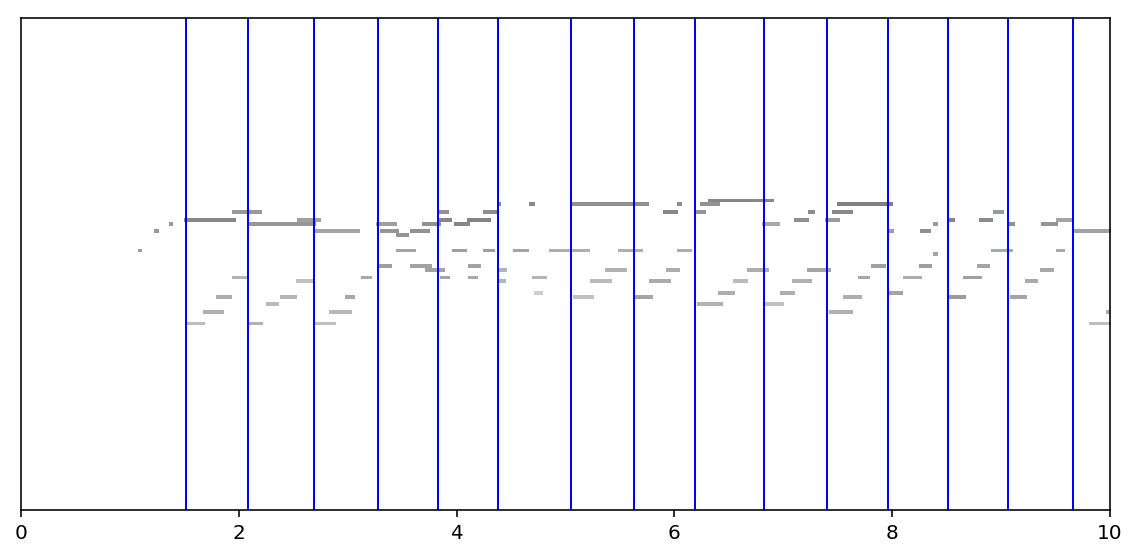

In [61]:
midi2midi_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-3/Na06_infer_corresp.txt')
midi_quant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-3/midi_cleaned.mid')
midi_unquant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-3/Na06.mid')

m2mdf = cleaned_m2m_df(midi2midi_path)
cl_q_b = cleaned_quant_beat(midi_quant_path)
cl_u_b = cleaned_unquant_beat(m2mdf,cl_q_b)

# mididata = pm.PrettyMIDI(str(midi_quant_path))
# beats = mididata.get_beats()

print(m2mdf.head())
print(cl_q_b[0:3])
print(cl_u_b[0:3])

visualize_on_pianoroll(midi_unquant_path, cl_u_b,0,10)

In [62]:
#it should fail because of the time change

score_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/musicxml_cleaned.musicxml')
midi_quant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/midi_cleaned.mid')
score2midi_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/Na06_infer_match.txt')
midi2midi_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/Na06_infer_corresp.txt')
midi_unquant_path = Path('virtuosonet_xmlmidi/Beethoven/Piano_Sonatas/8-1/Na06.mid')

m2mdf = cleaned_m2m_df(midi2midi_path)
cl_q_b = cleaned_quant_beat(midi_quant_path)
cl_u_b = cleaned_unquant_beat(m2mdf,cl_q_b)

# mididata = pm.PrettyMIDI(str(midi_quant_path))
# beats = mididata.get_beats()

print(m2mdf.head())
print(cl_q_b[0:3])
print(cl_u_b[0:3])

visualize_on_pianoroll(midi_unquant_path, cl_u_b,0,10)

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


ValueError: Too many unexpected beats. Probably the tempo or time signature change.

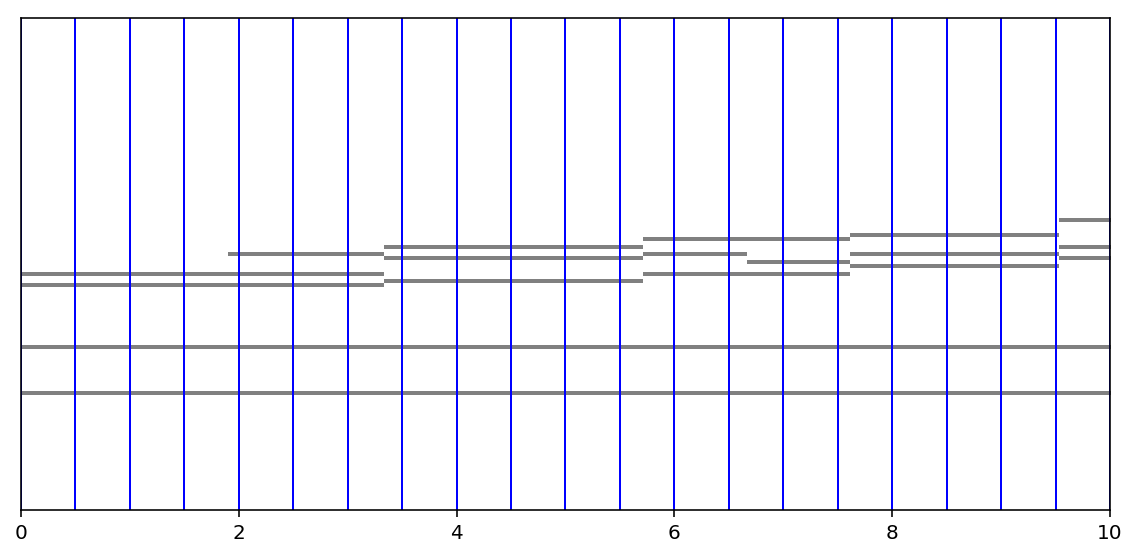

In [264]:
midi2midi_path = Path('virtuosonet_xmlmidi',df["midi2midi_alignment_path"].loc[291])
midi_quant_path = Path('virtuosonet_xmlmidi',df["score_midi_path"].loc[291])
midi_unquant_path = Path('virtuosonet_xmlmidi',df["performed_midi_path"].loc[291])

m2mdf = cleaned_m2m_df(midi2midi_path)
cl_q_b = cleaned_quant_beat(midi_quant_path)
# print(cl_q_b)
cl_u_b = cleaned_unquant_beat(m2mdf,cl_q_b)
# print(cl_u_b)

# mididata = pm.PrettyMIDI(str(midi_quant_path))
# beats = mididata.get_beats()

# print(m2mdf.head())
# print(cl_q_b[0:3])
# print(cl_u_b[0:3])

visualize_on_pianoroll(midi_quant_path, cl_q_b,0,10)

# Create the dataframe
Fields:
- author
- name
- folder
- performance_midi
- score_midi
- score_xml
- score2midi_alignment
- midi2midi_alignment_path
- beats
- downbeats

Dataframe problems:
- Bach/Fugue/bwv_860/midi_cleaned.mid, index: 29, the downbeat is every 3 downbeats
- Scriabin/Etudes_op_8/11/midi_cleaned.mid, index: 938, downbeat is half of the downbeat, beat is not aligned
- Bach/Fugue/bwv_857/Bult-ItoS02.mid, index: 16, beat have problems because matched with wrong note of trillo

In [8]:
def parse_folder_content(folder_path,base_path):
    #take the performance_midi
    assert(Path(base_path,folder_path.relative_to(base_path),"midi_cleaned.mid").exists())
    score_midi_path = Path(folder_path.relative_to(base_path),"midi_cleaned.mid").as_posix()
    #take the score_midi
    assert( Path(base_path,folder_path.relative_to(base_path),"musicxml_cleaned.musicxml").exists())
    score_xml_path = Path(folder_path.relative_to(base_path),"musicxml_cleaned.musicxml").as_posix()
    #find the performances
    performances_name = []
    for file in folder_path.iterdir():
        if file.suffix == ".mid" and file.name != "midi_cleaned.mid" and (not file.name.endswith("XP.mid")) and file.name!="midi.mid":
            performances_name.append(file)
    #iterate over the performances
    performances = []
    for p in performances_name:
        #check if everything exists
        assert(Path(base_path,folder_path.relative_to(base_path),p.name).exists())
        assert(Path(base_path,folder_path.relative_to(base_path),p.stem + "_infer_corresp.txt").exists())
        assert(Path(base_path,folder_path.relative_to(base_path),p.stem + "_infer_match.txt"))
        performances.append({
            "performer" : p.stem,
            "score_midi_path" : score_midi_path,
            "score_xml_path" : score_xml_path,
            "performed_midi_path": Path(folder_path.relative_to(base_path),p.name).as_posix(),
            "score2midi_alignment" : Path(folder_path.relative_to(base_path),p.stem + "_infer_match.txt").as_posix(),
            "midi2midi_alignment_path" : Path(folder_path.relative_to(base_path),p.stem + "_infer_corresp.txt").as_posix()
        })
    return performances     

In [9]:
#explore all the subfolders and collect the useful files name

basepath = Path('')
performances = []
for e in basepath.iterdir(): #loop on the authors
    if e.is_dir() and e.name[0] != ".":
        for ee in e.iterdir(): # loop on kind of opus or piece
            assert(ee.is_dir())
            # can be inside a piece folder or list of pieces folders
            if any([eee.is_dir() for eee in ee.iterdir()]): #this contains folder of pieces
                for eee in ee.iterdir():
                    if eee.is_dir():
                        ps = (parse_folder_content(eee,basepath))
                        #add title and author
                        for p in ps:
                            p["title"] = ee.name+"_"+eee.name
                            p["author"] = e.name
                        performances.extend(ps)
            else: 
                ps = (parse_folder_content(ee,basepath))
                #add title and author
                for p in ps:
                    p["title"] = ee.name
                    p["author"] = e.name
                performances.extend(ps)

AssertionError: 

In [19]:
performances[45:48]

[{'author': 'Bach',
  'midi2midi_alignment_path': 'Bach/Fugue/bwv_873/Lisiecki02_infer_corresp.txt',
  'performed_midi_path': 'Bach/Fugue/bwv_873/Lisiecki02.mid',
  'performer': 'Lisiecki02',
  'score2midi_alignment': 'Bach/Fugue/bwv_873/Lisiecki02_infer_match.txt',
  'score_midi_path': 'Bach/Fugue/bwv_873/midi_cleaned.mid',
  'score_xml_path': 'Bach/Fugue/bwv_873/musicxml_cleaned.musicxml',
  'title': 'Fugue_bwv_873'},
 {'author': 'Bach',
  'midi2midi_alignment_path': 'Bach/Fugue/bwv_873/Lisiecki13_infer_corresp.txt',
  'performed_midi_path': 'Bach/Fugue/bwv_873/Lisiecki13.mid',
  'performer': 'Lisiecki13',
  'score2midi_alignment': 'Bach/Fugue/bwv_873/Lisiecki13_infer_match.txt',
  'score_midi_path': 'Bach/Fugue/bwv_873/midi_cleaned.mid',
  'score_xml_path': 'Bach/Fugue/bwv_873/musicxml_cleaned.musicxml',
  'title': 'Fugue_bwv_873'},
 {'author': 'Bach',
  'midi2midi_alignment_path': 'Bach/Fugue/bwv_874/BianF01_infer_corresp.txt',
  'performed_midi_path': 'Bach/Fugue/bwv_874/BianF01.m

In [20]:
df = pd.DataFrame(performances)

In [21]:
df.groupby("title").count()

author  midi2midi_alignment_path  \
title                                                                   
Annees_de_pelerinage_2_1_Gondoliera       2                         2   
Ballade_2                                 1                         1   
Ballades_1                               18                        18   
Ballades_2                                5                         5   
Ballades_3                                3                         3   
Ballades_4                               12                        12   
Barcarolle                                9                         9   
Berceuse_op_57                            5                         5   
Concert_Etude_S145_1                      1                         1   
Etudes_op_10_1                           26                        26   
Etudes_op_10_10                           4                         4   
Etudes_op_10_12                          13                        13   
Etudes_op_10_2                           11                        11   
Etudes_op_10_3                            1                         1   
Etudes_op_10_4                           26                        26   
Etudes_op_10_5                           11                        11   
Etudes_op_10_7                            3                         3   
Etudes_op_10_8                           28                        28   
Etudes_op_25_1                            5                         5   
Etudes_op_25_10                          12                        12   
Etudes_op_25_11                          25                        25   
Etudes_op_25_12                           9                         9   
Etudes_op_25_2                            1                         1   
Etudes_op_25_4                            2                         2   
Etudes_op_25_5                            2                         2   
Etudes_op_25_8                            4                         4   
Etudes_op_8_11                            2                         2   
Fantasie_475                              1                         1   
Fugue_bwv_846                             1                         1   
Fugue_bwv_848                             9                         9   
...                                     ...                       ...   
Prelude_bwv_887                           1                         1   
Prelude_bwv_888                           1                         1   
Prelude_bwv_889                           6                         6   
Prelude_bwv_891                           2                         2   
Prelude_bwv_892                           2                         2   
Prelude_bwv_893                           3                         3   
Preludes_op_23_2                          1                         1   
Preludes_op_32_10                         1                         1   
Preludes_op_32_5                          1                         1   
Scherzos_20                               4                         4   
Scherzos_31                              12                        12   
Scherzos_39                               2                         2   
Sonata                                    2                         2   
Sonata_2_1st_no_repeat                    5                         5   
Sonata_2_2nd                              1                         1   
Sonata_2_2nd_no_repeat                    2                         2   
Sonata_2_3rd                              2                         2   
Sonata_2_3rd_no_repeat                    1                         1   
Sonata_2_4th                              3                         3   
Sonata_3_2nd                              9                         9   
Sonata_3_3rd                              9                         9   
Sonata_3_4th                              9                         9   
Sonatas_5             

In [22]:
#add the downbeat

BASE_PATH = Path('virtuosonet_xmlmidi/') 

def row_to__unquantized_downbeat(row):
    m2m_p = Path(BASE_PATH, row["midi2midi_alignment_path"])
    m2mdf = cleaned_m2m_df(m2m_p)
    try:
        cl_q_db = cleaned_quant_downbeat(Path(BASE_PATH,row["score_midi_path"]))
        cl_u_db = cleaned_unquant_downbeat(m2mdf,cl_q_db)
        return cl_u_db
    except ValueError:
        print("Failed for song",row["title"])
        return None
    return None

df.columns
df["performed_downbeat"] = df.apply(row_to__unquantized_downbeat,axis=1)

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


Failed for song Islamey
Failed for song Islamey
Failed for song Islamey
Failed for song Islamey
Failed for song Islamey
Failed for song Piano_Sonatas_13-4
Failed for song Piano_Sonatas_14-3
Failed for song Piano_Sonatas_15-1
Failed for song Piano_Sonatas_15-1
Failed for song Piano_Sonatas_15-1
Failed for song Piano_Sonatas_15-4
Failed for song Piano_Sonatas_17-1
Failed for song Piano_Sonatas_17-1
Failed for song Piano_Sonatas_17-1
Failed for song Piano_Sonatas_17-1
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_17-1_no_repeat
Failed for song Piano_Sonatas_18-1


Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_11
Failed for song Etudes_op_25_2
Failed for song Etudes_op_25_4
Failed for song Etudes_op_25_4
Failed for song Etudes_op_25_5
Failed for song Etudes_op_25_5
Failed for song Scherzos_20
Failed for song Scherzos_20
Failed for song Scherzos_20
Failed for song Scherzos_

In [26]:
print (df.shape)
good_df = df[df["performed_downbeat"].notnull()]
print (good_df.shape)
good_df = good_df[[not np.isnan(db[0]) for db in good_df["performed_downbeat"]]]
print (good_df.shape)

(941, 9)
(577, 9)
(550, 9)


There are 364 pieces where the tempo or metric are changing (or other aligment mistakes that generate similar results).

There are 27 pieces where there are some Nan at the beginning (probably a missed ritornello at the beginning).

550 pieces left

In [29]:
#add the beat

BASE_PATH = Path('virtuosonet_xmlmidi/') 

def row_to__unquantized_beat(row):
    m2m_p = Path(BASE_PATH, row["midi2midi_alignment_path"])
    m2mdf = cleaned_m2m_df(m2m_p)
    try:
        cl_q_b = cleaned_quant_beat(Path(BASE_PATH,row["score_midi_path"]))
        cl_u_b = cleaned_unquant_beat(m2mdf,cl_q_b)
        return cl_u_b
    except ValueError:
        print("Failed for song",row["title"])
        return None
    return None


good_df["performed_beat"] = good_df.apply(row_to__unquantized_beat,axis=1)

C:\Users\fosca\Anaconda3\envs\music_env\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


Unexpected value 86.2713 smaller than the previous 93.63315
Failed for song Piano_Sonatas_18-4
Failed for song Piano_Sonatas_18-4
Failed for song Piano_Sonatas_21-3
Failed for song Piano_Sonatas_21-3
Failed for song Piano_Sonatas_21-3
Unexpected value 44.9733 smaller than the previous 45.68376666666666
Unexpected value 403.715 smaller than the previous 404.3156
Unexpected value 386.9565 smaller than the previous 387.6782
Unexpected value 281.721 smaller than the previous 282.194
Unexpected value 227.43200000000002 smaller than the previous 231.30599999999998
Unexpected value 234.87633333333335 smaller than the previous 239.71400000000003
Unexpected value 231.11566666666667 smaller than the previous 241.975
Unexpected value 233.435 smaller than the previous 245.07299999999998
Unexpected value 205.29399999999998 smaller than the previous 209.88099999999997
Unexpected value 190.0076 smaller than the previous 198.732
Unexpected value 199.3994 smaller than the previous 206.30200000000002
Un

In [ ]:
good_df

In [ ]:
#visualization and sonification function

def sonify_peaks(midi_path,interval,peaks_sec,audio_fs):
    midi_data = pm.PrettyMIDI(str(midi_path))
    #compute audio
    audio_data = midi_data.synthesize(fs=audio_fs)[interval[0]*audio_fs:interval[1]*audio_fs]
    x_peaks = librosa.clicks(peaks_sec, sr=audio_fs, click_freq=1000, length=len(audio_data))
    ipd.display(ipd.Audio(audio_data + x_peaks,rate =audio_fs))

def visualize_from_df(index,df,interval,mark_type):
    if mark_type == "beat":
        marks = df["performed_beat"].loc[index]
    elif mark_type == "downbeat":
        marks = df["performed_downbeat"].loc[index]
    else:
        raise TypeError("The mark type can be either 'beat' or 'downbeat'")
    performed_midi_path = Path(BASE_PATH,df["performed_midi_path"].loc[index])
    sonify_peaks(performed_midi_path,interval,marks, AUDIO_FS)
    visualize_on_pianoroll(performed_midi_path, marks,interval[0],interval[1])

BASE_PATH = Path('virtuosonet_xmlmidi/') 
AUDIO_FS = 22050


In [ ]:
#big problem with ternary/binary metric
visualize_from_df(938,good_df, (0,30),"downbeat")

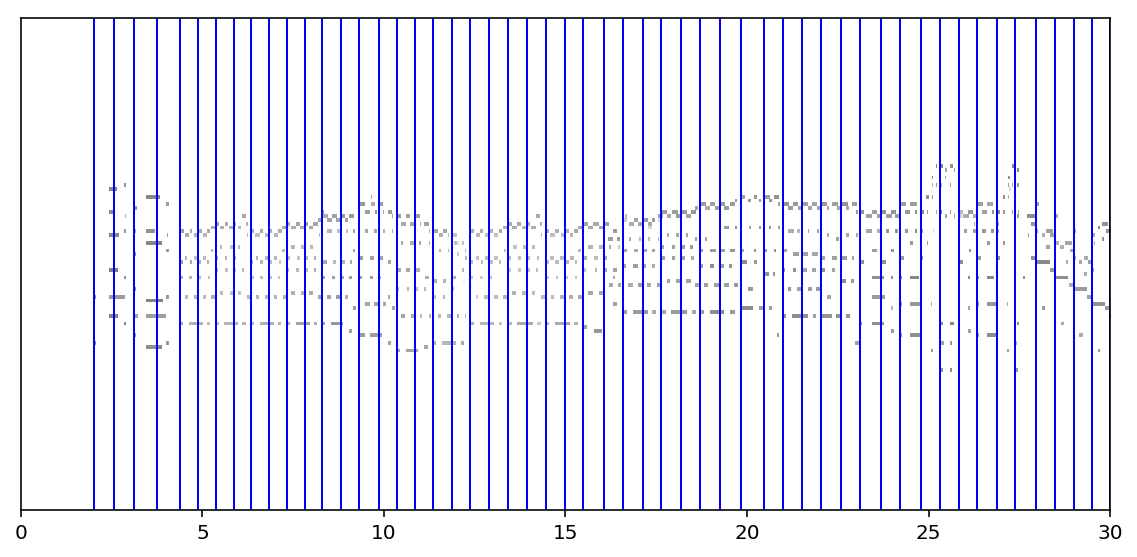

In [202]:
visualize_from_df(936,good_df, (0,30),"beat")

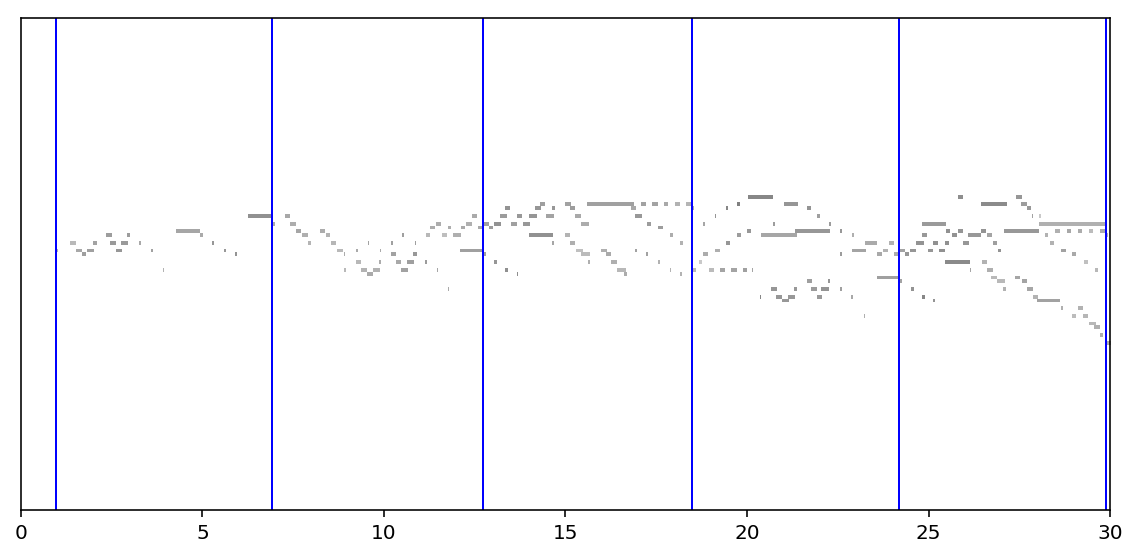

In [229]:
#problem with the downbeat too sparse

visualize_from_df(29,good_df, (0,30),"downbeat")

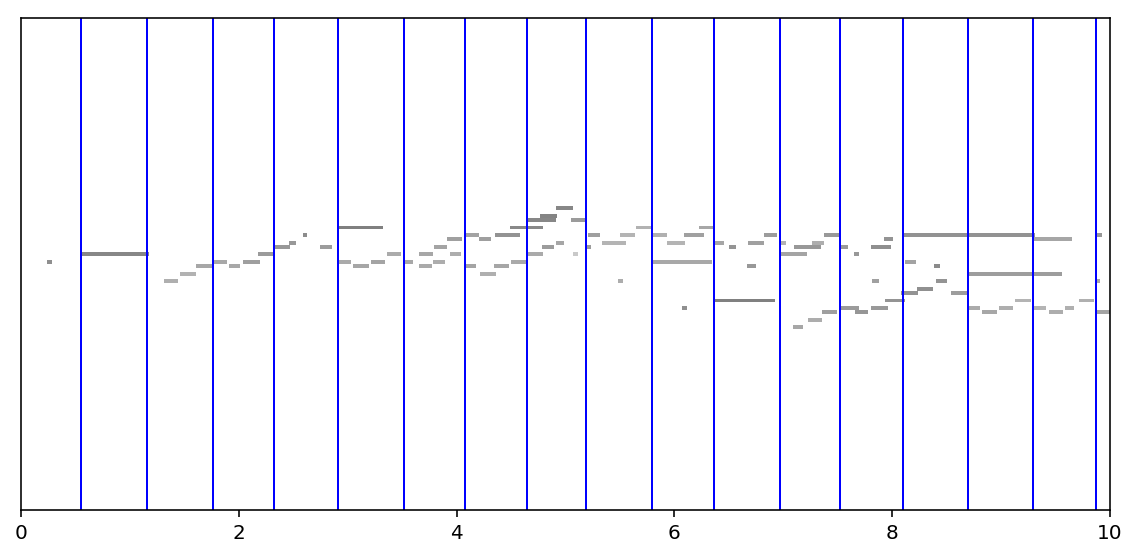

In [225]:
visualize_from_df(10,good_df, (0,10),"beat")

In [245]:
good_df

author                           midi2midi_alignment_path  \
0        Bach         Bach/Fugue/bwv_846/Shi05_infer_corresp.txt   
1        Bach    Bach/Fugue/bwv_848/Denisova06_infer_corresp.txt   
2        Bach         Bach/Fugue/bwv_848/Lee01_infer_corresp.txt   
3        Bach       Bach/Fugue/bwv_848/LeeSH01_infer_corresp.txt   
4        Bach         Bach/Fugue/bwv_848/Lin04_infer_corresp.txt   
5        Bach         Bach/Fugue/bwv_848/Lou01_infer_corresp.txt   
6        Bach  Bach/Fugue/bwv_848/MiyashitaM01_infer_corresp.txt   
7        Bach    Bach/Fugue/bwv_848/Mizumoto03_infer_corresp.txt   
8        Bach        Bach/Fugue/bwv_848/SunY01_infer_corresp.txt   
9        Bach        Bach/Fugue/bwv_848/Zhou01_infer_corresp.txt   
10       Bach         Bach/Fugue/bwv_854/LuA01_infer_corresp.txt   
11       Bach  Bach/Fugue/bwv_854/MiyashitaM01_infer_corresp.txt   
12       Bach       Bach/Fugue/bwv_854/Ozaki01_infer_corresp.txt   
13       Bach  Bach/Fugue/bwv_854/Richardson01_infer_corresp.txt   
14       Bach       Bach/Fugue/bwv_854/WangA01_infer_corresp.txt   
15       Bach        Bach/Fugue/bwv_856/LuoJ01_infer_corresp.txt   
16       Bach   Bach/Fugue/bwv_857/Bult-ItoS02_infer_corresp.txt   
17       Bach         Bach/Fugue/bwv_857/Lan01_infer_corresp.txt   
18       Bach    Bach/Fugue/bwv_857/Lisiecki04_infer_corresp.txt   
19       Bach         Bach/Fugue/bwv_857/ToA01_infer_corresp.txt   
20       Bach       Bach/Fugue/bwv_857/WangA01_infer_corresp.txt   
21       Bach         Bach/Fugue/bwv_857/YuP01_infer_corresp.txt   
22       Bach         Bach/Fugue/bwv_858/VuV01_infer_corresp.txt   
23       Bach       Bach/Fugue/bwv_858/Zhang01_infer_corresp.txt   
24       Bach          Bach/Fugue/bwv_860/Ko04_infer_corresp.txt   
25       Bach   Bach/Fugue/bwv_860/Nikiforov05_infer_corresp.txt   
26       Bach    Bach/Fugue/bwv_860/Tetzloff04_infer_corresp.txt   
27       Bach       Bach/Fugue/bwv_860/TuanS01_infer_corresp.txt   
28       Bach      Bach/Fugue/bwv_860/YoungS01_infer_corresp.txt   
29       Bach      Bach/Fugue/bwv_860/ZhangH04_infer_corresp.txt   
..        ...                                                ...   
903  Schubert  Schubert/Impromptu_op142/3/WangH06_infer_corre...   
904  Schubert  Schubert/Impromptu_op142/3/YoungS06_infer_corr...   
905  Schubert  Schubert/Moment_Musical_no_1/MunA10_infer_corr...   
906  Schubert  Schubert/Moment_musical_no_3/Tetzloff09_infer_...   
907  Schubert  Schubert/Piano_Sonatas/664-1/BuiJL06_infer_cor...   
908  Schubert  Schubert/Piano_Sonatas/664-1/KabuliL10_infer_c...   
909  Schubert  Schubert/Piano_Sonatas/664-1/Lin07_infer_corre...   
910  Schubert  Schubert/Piano_Sonatas/664-1/Mo10_infer_corres...   
911  Schubert  Schubert/Piano_Sonatas/664-2/KabuliL11_infer_c...   
912  Schubert  Schubert/Piano_Sonatas/664-2/Lin07_infer_corre...   
914  Schubert  Schubert/Piano_Sonatas/664-3/Lin07_infer_corre...   
915  Schubert  Schubert/Piano_Sonatas/894-2/KimSY16_infer_cor...   
916  Schubert  Schubert/Piano_Sonatas/894-2/LEE_K08_infer_cor...   
917  Schubert  Schubert/Piano_Sonatas/894-2/Yeletskiy08_infer...   
918  Schubert  Schubert/Piano_Sonatas/894-2_no_repeat/BianF14...   
919  Schubert  Schubert/Piano_Sonatas/894-2_no_repeat/Chan01_...   
920  Schubert  Schubert/Piano_Sonatas/894-2_no_repeat/CHEN11_...   
921  Schubert  Schubert/Piano_Sonatas/894-2_no_repeat/HouY09_...   
922  Schubert  Schubert/Piano_Sonatas/894-2_no_repeat/Lee10_i...   
923  Schubert  Schubert/Piano_Sonatas/894-2_no_repeat/SINKEV1...   
927  Schumann  Schumann/Kreisleriana/1/Yarden09_infer_corresp...   
929  Schumann  Schumann/Kreisleriana/3/Yarden09_infer_corresp...   
930  Schumann  Schumann/Kreisleriana/4/Yarden09_infer_corresp...   
931  Schumann  Schumann/Kreisleriana/5/Yarden09_infer_corresp...   
933  Schumann  Schumann/Kreisleriana/7/Yarden09_infer_corresp...   
934  Schumann        Schumann/Toccata/BENABD04_infer_corresp.txt   
935  Schumann        Schumann/Toccata/BENABD10_infer_corresp.tx

In [238]:
print(good_df.shape)
good_df = good_df[good_df["performed_beat"].notnull()]
print(good_df.shape)

(550, 10)
(545, 10)


In [239]:
good_df.to_pickle("cleaned_virtuosonet.pickle")

## Check the quality of df

In [240]:
df = pd.read_pickle("cleaned_virtuosonet.pickle")

In [266]:
df.loc[291]

author                                                              Beethoven
midi2midi_alignment_path    Beethoven/Piano_Sonatas/24-1/DeTurck06_infer_c...
performed_midi_path                Beethoven/Piano_Sonatas/24-1/DeTurck06.mid
performer                                                           DeTurck06
score2midi_alignment        Beethoven/Piano_Sonatas/24-1/DeTurck06_infer_m...
score_midi_path                 Beethoven/Piano_Sonatas/24-1/midi_cleaned.mid
score_xml_path              Beethoven/Piano_Sonatas/24-1/musicxml_cleaned....
title                                                      Piano_Sonatas_24-1
performed_downbeat          [1.2339725, 3.5265077499999995, 5.819042999999...
performed_beat              [1.2339725, 1.627232894736842, 2.0204932894736...
Name: 291, dtype: object

In [250]:
#check if all the downbeats are beats
for i,r in df.iterrows():
    if all([db in r["performed_beat"] for db in r["performed_downbeat"]]):
        print(i, True)
    else:
        unaligned = []
        for db in r["performed_downbeat"]:
            if db not in r["performed_beat"]:
                unaligned.append(db)
        print(i, unaligned)
            

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 [21.826175]
17 [19.924425]
18 True
19 [25.48375]
20 True
21 [22.623150000000003]
22 True
23 True
24 [119.954]
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 [4.160315]
43 [2.8889050000000003]
44 [2.76282]
45 True
46 True
50 True
51 True
52 True
53 True
54 True
55 True
56 True
63 True
64 [148.8245, 158.82925]
65 [133.40425, 143.20499999999998]
66 [159.79649999999998, 171.96783333333332]
67 [131.26512499999998, 140.51983333333334]
68 [128.57399999999998, 138.63958333333335]
69 [122.112875, 131.82875]
70 True
72 True
73 True
74 True
75 True
76 True
77 True
78 [251.34433333333334, 252.22466666666665]
79 True
80 True
81 True
82 True
83 True
84 True
85 True
86 True
87 True
88 True
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True
100 True
101 Tr

356 [4.265772380952381, 7.006104761904762, 9.746437142857143, 12.486769523809524, 15.227101904761906, 17.967434285714287, 24.6906, 26.5941, 30.3819375, 32.266275, 34.1506125, 38.0281375, 40.021325000000004, 42.0145125, 45.780550000000005, 54.60395, 58.157650000000004, 62.3931, 66.87242499999999, 68.87045, 70.868475, 75.07114166666668, 77.27578333333334, 81.499565625, 83.51870625000001, 85.53784687500001, 87.5569875, 89.576128125, 91.59526875, 93.61440937500001, 97.98568571428571, 100.33782142857143, 102.68995714285714, 105.04209285714286, 107.39422857142857, 109.7463642857143, 116.19066666666666, 118.08283333333333, 122.324, 124.673, 127.022, 131.67112500000002, 133.97125, 136.271375, 140.56866666666667, 142.56583333333333, 148.369, 150.258, 154.15025000000003, 156.1535, 158.15675000000002, 162.04325, 163.9265, 165.80975, 169.5293333333333, 171.36566666666667, 177.35399999999998, 179.448, 183.46699999999998, 187.203, 190.7825, 194.33849999999998, 198.5025, 207.40966666666668, 209.32333

385 [4.966308461538462, 7.631599423076924, 10.296890384615386, 12.962181346153848, 15.62747230769231, 18.292763269230772, 20.958054230769235, 23.623345192307696, 26.288636153846156, 28.95392711538462, 31.619218076923083, 34.28450903846154, 39.66479230769231, 42.379784615384615, 45.09477692307692, 47.809769230769234, 50.52476153846153, 53.239753846153846, 55.95474615384615, 58.66973846153846, 61.384730769230764, 64.09972307692307, 66.81471538461538, 69.52970769230768, 78.73840714285714, 80.83943928571428, 82.94047142857143, 85.04150357142856, 87.14253571428571, 89.24356785714285, 92.94056338028169, 94.53652676056338, 96.13249014084506, 97.72845352112677, 99.32441690140845, 100.92038028169014, 102.51634366197183, 104.11230704225352, 105.70827042253521, 107.3042338028169, 108.90019718309858, 110.49616056338027, 112.09212394366196, 113.68808732394366, 115.28405070422535, 116.88001408450704, 118.47597746478873, 120.07194084507042, 121.66790422535212, 123.2638676056338, 124.8598309859155, 12

400 [10.983740000000001, 13.494185, 16.00463, 18.515075, 21.02552, 23.535964999999997, 26.046409999999998, 28.556855, 41.6420875, 44.256575, 46.871062499999994, 49.485549999999996, 52.1000375, 57.23221666666666, 59.74990833333333, 62.267599999999995, 64.78529166666667, 67.30298333333333, 69.820675, 72.33836666666667, 74.85605833333334, 87.38829999999999, 89.7199, 92.0515, 94.3831, 96.7147, 101.3622888888889, 103.67827777777778, 105.99426666666668, 108.31025555555556, 110.62624444444445, 112.94223333333333, 115.25822222222223, 117.57421111111111, 122.04604444444445, 124.20188888888889, 126.35773333333334, 128.51357777777778, 130.66942222222224, 132.82526666666666, 134.98111111111112, 137.13695555555555, 141.64182222222223, 143.99084444444443, 146.33986666666667, 148.6888888888889, 151.0379111111111, 153.38693333333333, 155.73595555555556, 158.08497777777777, 162.41983333333334, 164.40566666666666, 168.3516666666667, 170.31183333333334, 174.24816666666666, 176.22433333333333, 180.3244999

651 True
652 True
653 True
654 [100.23574285714284, 118.716, 120.757, 122.798, 124.839, 126.88, 128.921, 130.962, 133.00300000000001, 135.044, 137.085, 146.7569, 150.78265, 154.44688888888888, 156.14627777777778, 157.84566666666666, 159.54505555555556, 161.24444444444444, 162.94383333333334, 164.64322222222222, 166.34261111111113, 169.6692857142857, 172.48751428571424, 174.4874571428571, 176.48739999999998, 178.48734285714283, 180.4872857142857, 182.48722857142855, 184.4871714285714, 186.48711428571428, 188.48705714285714, 200.40322727272726, 202.10845454545452, 203.8136818181818, 205.5189090909091, 207.22413636363635, 208.92936363636363, 210.6345909090909, 212.33981818181817, 214.04504545454546, 215.75027272727272, 225.68220000000002, 227.2964, 228.9106, 230.5248, 232.139, 233.7532, 235.36739999999998, 236.9816, 238.5958, 250.48835, 252.4842, 254.48005, 256.47589999999997, 258.47175, 260.4676, 262.46344999999997, 264.4593, 266.45514999999995, 280.30050000000006, 282.3616666666667, 284

698 [10.270416, 13.447425333333333, 16.624434666666666, 19.801444, 22.978453333333334, 26.155462666666665, 29.332472, 32.50948133333333, 35.68649066666667, 41.489650000000005, 44.1158, 46.74195, 49.368100000000005, 51.99425000000001, 54.620400000000004, 57.246550000000006, 59.87270000000001, 62.498850000000004, 65.125, 67.75115000000001, 70.3773, 73.00345000000002, 75.62960000000001, 100.2475568181818, 102.15086363636362, 104.05417045454544, 105.95747727272726, 107.86078409090908, 109.7640909090909, 111.66739772727273, 113.57070454545455, 115.47401136363636, 117.37731818181818, 119.280625, 121.18393181818182, 123.08723863636364, 124.99054545454545, 126.89385227272729, 128.7971590909091, 130.70046590909092, 132.60377272727274, 134.50707954545456, 136.41038636363638, 138.3136931818182, 144.23422222222223, 145.71744444444445, 147.20066666666668, 148.6838888888889, 150.1671111111111, 151.65033333333332, 153.13355555555555, 154.61677777777777, 159.09355555555555, 160.5561111111111, 162.0186

705 [7.140523999999999, 10.239554666666667, 13.338585333333333, 16.437616, 19.536646666666662, 22.635677333333334, 25.734707999999998, 28.83373866666666, 31.932769333333333, 37.63093, 40.23006, 42.82919, 45.42832, 48.02745, 50.626580000000004, 53.22571000000001, 55.82484000000001, 58.42397000000001, 61.02310000000001, 63.62223000000001, 66.22136, 68.82049, 71.41962000000001, 97.15302727272727, 99.17845454545454, 101.20388181818183, 103.2293090909091, 105.25473636363637, 107.28016363636364, 109.30559090909091, 111.3310181818182, 113.35644545454547, 115.38187272727274, 117.4073, 119.43272727272728, 121.45815454545456, 123.48358181818182, 125.5090090909091, 127.53443636363637, 129.55986363636364, 131.58529090909093, 133.61071818181819, 135.63614545454547, 137.66157272727276, 143.98711111111112, 145.61822222222222, 147.24933333333334, 148.88044444444444, 150.51155555555556, 152.14266666666666, 153.77377777777778, 155.40488888888888, 160.12877777777777, 161.73355555555557, 163.3383333333333

830 [166.93395833333332, 172.88599999999997]
831 [102.4717]
832 True
833 True
834 [115.18763333333334]
835 True
836 True
837 True
838 True
839 True
840 True
841 True
842 True
843 True
844 True
845 True
846 True
847 True
848 True
849 True
850 True
851 True
852 True
853 True
855 [94.29665]
856 [230.259, 232.492, 248.1278333333333, 249.70966666666666, 252.88516666666666, 254.4788333333333, 257.53383333333335, 258.99516666666665, 261.5695, 264.81025, 268.8603333333333, 270.78266666666667, 272.705, 274.6273333333333, 276.54966666666667, 280.3395, 285.8635, 297.03200000000004, 303.0318, 304.5532, 306.07460000000003, 310.55595, 312.2833, 314.01065, 320.79449999999997, 323.276, 325.7575, 328.239, 330.7205, 333.202, 335.6835, 338.165, 340.6465, 343.128, 345.6095]
857 [249.53466666666668, 251.58433333333335, 265.5788333333333, 267.1111666666667, 270.3635, 272.0835, 275.42466666666667, 277.04583333333335, 280.05100000000004, 283.895, 288.48850000000004, 292.8345, 295.047, 297.2595, 305.1953333333

894 True
895 True
896 True
897 [156.0213888888889, 156.29427777777778, 156.56716666666668, 156.84005555555555, 157.11294444444445, 157.38583333333332, 157.65872222222222, 157.9316111111111, 295.35225, 364.33500000000004, 393.2203333333334, 422.59175, 519.6116666666667, 532.4169999999999, 576.7815, 616.19425]
898 [160.67000000000002, 196.099, 281.97524999999996, 355.23866666666663, 389.64300000000003, 424.476, 526.7288333333333, 542.322, 591.70325, 634.60775]
899 [152.96685714285715, 153.4267142857143, 153.88657142857144, 154.34642857142856, 154.8062857142857, 155.26614285714285, 155.7255, 269.17674999999997, 339.9646666666667, 372.2706666666666, 483.8096, 484.1092, 484.40880000000004, 484.70840000000004, 486.71299999999997, 488.1933333333333, 502.5245, 544.1415, 583.1099999999999]
900 [155.78008333333332, 156.11866666666666, 156.45725, 156.79583333333332, 157.13441666666665, 159.32099999999997, 274.0, 344.6893333333333, 375.968, 518.1009999999999, 532.491, 576.2065, 616.1312499999999]


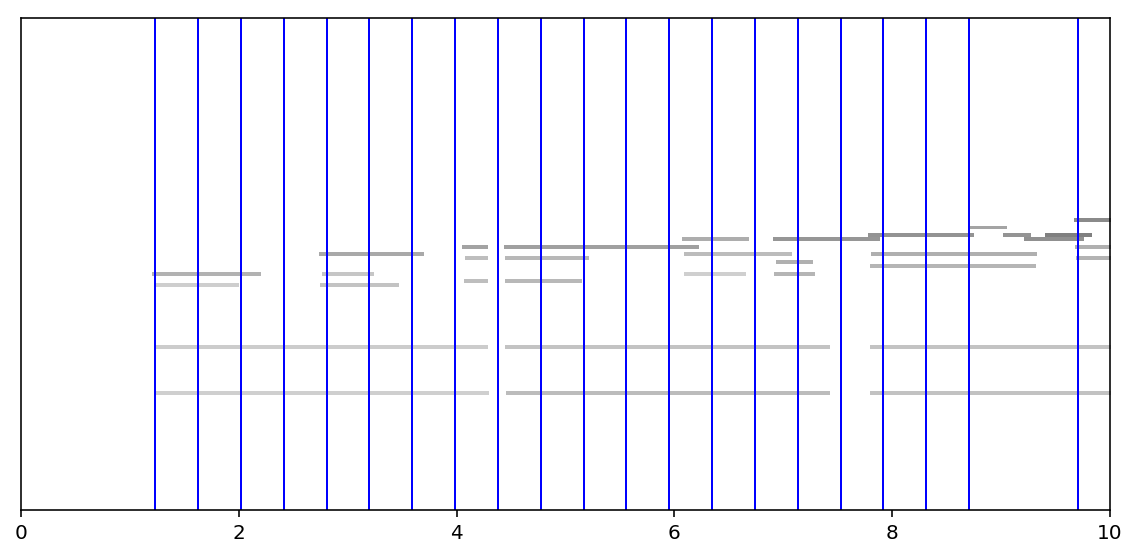

In [263]:
visualize_from_df(291,good_df, (0,10),"beat")

In [268]:
df.groupby("title").count()

author  midi2midi_alignment_path  \
title                                                       
Ballade_2                     1                         1   
Ballades_3                    3                         3   
Berceuse_op_57                5                         5   
Concert_Etude_S145_1          1                         1   
Etudes_op_10_1               26                        26   
Etudes_op_10_2               11                        11   
Etudes_op_10_4               26                        26   
Etudes_op_10_7                3                         3   
Etudes_op_10_8               28                        28   
Etudes_op_25_12               9                         9   
Etudes_op_25_8                4                         4   
Etudes_op_8_11                2                         2   
Fugue_bwv_846                 1                         1   
Fugue_bwv_848                 9                         9   
Fugue_bwv_854                 5                         5   
Fugue_bwv_856                 1                         1   
Fugue_bwv_857                 6                         6   
Fugue_bwv_858                 2                         2   
Fugue_bwv_860                 6                         6   
Fugue_bwv_862                 1                         1   
Fugue_bwv_863                 3                         3   
Fugue_bwv_864                 1                         1   
Fugue_bwv_865                 3                         3   
Fugue_bwv_866                 1                         1   
Fugue_bwv_867                 2                         2   
Fugue_bwv_868                 1                         1   
Fugue_bwv_870                 3                         3   
Fugue_bwv_873                 2                         2   
Fugue_bwv_875                 2                         2   
Fugue_bwv_876                 2                         2   
...                         ...                       ...   
Prelude_bwv_865               3                         3   
Prelude_bwv_866               1                         1   
Prelude_bwv_867               2                         2   
Prelude_bwv_868               1                         1   
Prelude_bwv_870               3                         3   
Prelude_bwv_873               2                         2   
Prelude_bwv_874               3                         3   
Prelude_bwv_875               3                         3   
Prelude_bwv_876               2                         2   
Prelude_bwv_880               3                         3   
Prelude_bwv_883               4                         4   
Prelude_bwv_884               1                         1   
Prelude_bwv_885               6                         6   
Prelude_bwv_887               1                         1   
Prelude_bwv_888               1                         1   
Prelude_bwv_889               6                         6   
Prelude_bwv_891               2                         2   
Prelude_bwv_892               2                         2   
Prelude_bwv_893               3                         3   
Preludes_op_23_2              1                         1   
Preludes_op_32_5              1                         1   
Scherzos_39                   2                         2   
Sonata_2_1st_no_repeat        5                         5   
Sonata_2_3rd                  2                         2   
Sonata_2_3rd_no_repeat        1                         1   
Sonata_2_4th                  3                         3   
Sonata_3_3rd                  9                         9   
The_Lark                      2                         2   
Toccata                      11                        11   
Transcendental_Etudes_9       2                         2   

                         performed_midi_path  performer  score2midi_alignment  \
title                                                                           
Ballade_2          